 ## EARLY-STAGE PREDICTION OF DIABETES

### PCA analysis:

<img src=Images/pca1.jpg width="450" height="450">
<img src=Images/pca2.jpg width="450" height="450">
<img src=Images/pca3.jpg width="450" height="450">


The three plots are the Principal Component Analysis plots for the individual omics datasets - Metabolomics, Proteomics and Lipidomics respectively. PCA plots are used for dimensionality reduction and hence relevant feature selection. In this scenario, we select those features that show the maximum variance from the mean axes of both the principal components. 


### Clustered Heatmap

<img src=Images/heatmap.jpg width="450" height="450">

The above plot is a clustered image map produced after integration of the three omics datasets. From the map, it becomes clear that the highly correlated features of each omics datasets are independent of those from the other datasets. This implies that the selected features from each dataset show little to no collinearity among each other. This indicates that the model that can be built henceforth will not be influenced by multicollinearity.

### Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten,Dense

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import seaborn as sn
import matplotlib.pyplot as plt

### Reading data from the dataset

In [3]:
df=pd.read_csv('datasets/lpm.csv')
df.head()

,SampleID,TAG58.8.FA22.6.Lipidomics,TAG58.9.FA18.1.Lipidomics,TAG58.9.FA18.2.Lipidomics,TAG58.9.FA22.6.Lipidomics,TAG60.12.FA22.6.Lipidomics,VTN.Proteomics,SERPING1.Proteomics,C2.Proteomics,APCS.Proteomics,IGHV3.23.Proteomics,C16H15NO5.Metabolomics,C19H34O15.Metabolomics,Tryptophan.betaine.2..Metabolomics,C12H22N6O2.Metabolomics,C22.4.FA..Adrenic.acid..Metabolomics,Class
0,ZOZOW1T-E11,1.7333,0.3811,0.3294,1.2646,0.2614,19458794.50,1.461850e+07,1711759.988,255568.0566,285553.98650,203417.8525,460302.0576,2060173.894,31369.16763,1.712774e+06,Diabetic
1,ZOZOW1T-E13,2.3332,0.5340,0.4847,1.8426,0.3826,16756529.00,1.312942e+07,1852381.727,159489.2876,174217.49720,145883.3609,407376.1750,1998828.928,70453.34467,4.534891e+05,Diabetic
2,ZOZOW1T-E14,2.0813,0.4820,0.4150,1.5556,0.3722,17211505.97,9.994272e+06,1653257.482,386988.1863,52239.37442,214421.1407,471304.8475,1948344.700,56703.69654,1.089655e+06,Diabetic
3,ZOZOW1T-E15,2.4707,0.5789,0.5181,1.9865,0.3995,19592660.78,1.466883e+07,1597317.859,217286.6480,333315.75820,186034.3336,479863.0002,2067495.077,50950.21936,1.919184e+06,Diabetic
4,ZOBX723-E11,2.5277,0.4301,0.4367,1.9111,0.1743,18536300.48,1.121176e+07,1635647.007,454254.0967,86056.10958,302531.9045,388315.7024,2848340.138,30327.68726,1.589609e+06,Prediabetic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SampleID                              169 non-null    object 
 1   TAG58.8.FA22.6.Lipidomics             169 non-null    float64
 2   TAG58.9.FA18.1.Lipidomics             169 non-null    float64
 3   TAG58.9.FA18.2.Lipidomics             169 non-null    float64
 4   TAG58.9.FA22.6.Lipidomics             169 non-null    float64
 5   TAG60.12.FA22.6.Lipidomics            169 non-null    float64
 6   VTN.Proteomics                        169 non-null    float64
 7   SERPING1.Proteomics                   169 non-null    float64
 8   C2.Proteomics                         169 non-null    float64
 9   APCS.Proteomics                       169 non-null    float64
 10  IGHV3.23.Proteomics                   169 non-null    float64
 11  C16H15NO5.Metabolom

### Preprocessing Data

In [29]:
df["Class"].unique()

array(['Diabetic', 'Prediabetic', 'Crossover', 'Control'], dtype=object)

In [35]:
ord_enc = OrdinalEncoder()
ord_enc = ord_enc.fit(df[["Class"]])
df["class_code"] = ord_enc.transform(df[["Class"]])
df[["Class", "class_code"]].head(5 )

,Class,class_code
0,Diabetic,2.0
1,Diabetic,2.0
2,Diabetic,2.0
3,Diabetic,2.0
4,Prediabetic,3.0


In [41]:
ord_enc.categories_

[array(['Control', 'Crossover', 'Diabetic', 'Prediabetic'], dtype=object)]

In [7]:
df = df.astype({'class_code':'int'})

df['class_code'].isnull().sum()

0

In [8]:
y=df.iloc[:,17:]
x=df.iloc[:,1:16]

In [42]:
cols_to_scale = ['TAG58.8.FA22.6.Lipidomics', 'TAG58.9.FA18.1.Lipidomics',
       'TAG58.9.FA18.2.Lipidomics', 'TAG58.9.FA22.6.Lipidomics',
       'TAG60.12.FA22.6.Lipidomics', 'VTN.Proteomics', 'SERPING1.Proteomics',
       'C2.Proteomics', 'APCS.Proteomics', 'IGHV3.23.Proteomics',
       'C16H15NO5.Metabolomics', 'C19H34O15.Metabolomics',
       'Tryptophan.betaine.2..Metabolomics', 'C12H22N6O2.Metabolomics',
       'C22.4.FA..Adrenic.acid..Metabolomics']

scaler = MinMaxScaler()
scaler = scaler.fit(x[cols_to_scale])
x[cols_to_scale] = scaler.transform(x[cols_to_scale])

In [10]:
df.class_code.unique()

array([2, 3, 1, 0])

In [11]:
x.shape
x.head()

,TAG58.8.FA22.6.Lipidomics,TAG58.9.FA18.1.Lipidomics,TAG58.9.FA18.2.Lipidomics,TAG58.9.FA22.6.Lipidomics,TAG60.12.FA22.6.Lipidomics,VTN.Proteomics,SERPING1.Proteomics,C2.Proteomics,APCS.Proteomics,IGHV3.23.Proteomics,C16H15NO5.Metabolomics,C19H34O15.Metabolomics,Tryptophan.betaine.2..Metabolomics,C12H22N6O2.Metabolomics,C22.4.FA..Adrenic.acid..Metabolomics
0,0.064727,0.086858,0.064414,0.060698,0.063803,0.279259,0.354406,0.491999,0.174957,0.075314,0.129512,0.256693,0.075268,0.012523,0.286398
1,0.097531,0.151928,0.135513,0.106049,0.098668,0.207355,0.297426,0.559155,0.104658,0.039375,0.088670,0.220422,0.072615,0.071703,0.012055
2,0.083756,0.129798,0.103603,0.083530,0.095676,0.219461,0.177458,0.464060,0.271115,0.000000,0.137323,0.264233,0.070432,0.050884,0.150648
3,0.105049,0.171036,0.150803,0.117339,0.103530,0.282821,0.356331,0.437345,0.146947,0.090732,0.117172,0.270098,0.075585,0.042172,0.331366
4,0.108166,0.107711,0.113538,0.111423,0.038748,0.254712,0.224046,0.455650,0.320333,0.010916,0.199870,0.207359,0.109352,0.010946,0.259566


In [12]:
class_labels=['Control','Crossover','Diabetic','Prediabetic']

### Building a model

In [13]:
model=keras.Sequential([
      keras.layers.Dense(15,input_shape=(15,),activation='relu'),
      keras.layers.Dense(100,activation='relu'),
      keras.layers.Dense(100,activation='relu'),
      keras.layers.Dense(100,activation='relu'),
      keras.layers.Dense(4,activation='softmax')
])

2023-02-05 01:44:01.262459: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 100)               1600      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 4)                 404       
                                                                 
Total params: 22,444
Trainable params: 22,444
Non-trainable params: 0
_________________________________________________________________


### Loss and Optimizations

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn,optimizer='Adam',metrics=['Accuracy'])

### Splitting the dataset into test and train

In [16]:

X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.8,shuffle=True)

### Training the model

In [49]:
history = model.fit(X_train,Y_train,validation_split= .2, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 32ms/step - loss: 0.0229 - Accuracy: 1.0000 - val_loss: 0.0135 - val_Accuracy: 1.0000
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0233 - Accuracy: 1.0000 - val_loss: 0.0105 - val_Accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0210 - Accuracy: 1.0000 - val_loss: 0.0095 - val_Accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0222 - Accuracy: 1.0000 - val_loss: 0.0088 - val_Accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0200 - Accuracy: 1.0000 - val_loss: 0.0105 - val_Accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0192 - Accuracy: 1.0000 - val_loss: 0.0144 - val_Accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0226 - Accuracy: 1.0000 - val_loss: 0.0119 - val_Accuracy: 1.0000
Epoch 8/100
4/4 [======

In [50]:
history.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

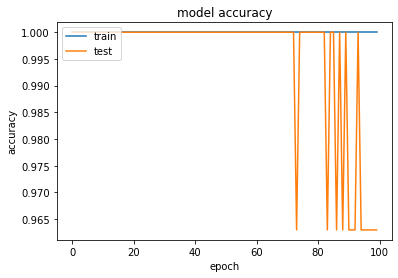

In [51]:
# summarize history for accuracy
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

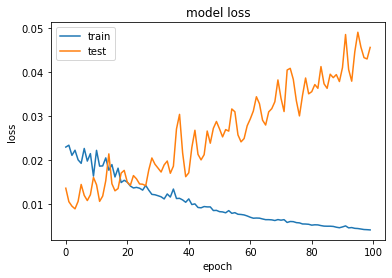

In [52]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating the results of the model using the test dataset

In [18]:

model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.6909 - Accuracy: 0.7941


/Users/jidhu/opt/anaconda3/envs/turbo/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


[0.6908513903617859, 0.7941176295280457]

### Model Evaluation Statistics

In [19]:
y_pred=model.predict(X_test)
yp=[]
for i in y_pred:
    yp.append(np.argmax(i))


In [20]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_test,yp))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         0
           3       0.92      0.82      0.87        28

    accuracy                           0.79        34
   macro avg       0.51      0.61      0.53        34
weighted avg       0.86      0.79      0.82        34



/Users/jidhu/opt/anaconda3/envs/turbo/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jidhu/opt/anaconda3/envs/turbo/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jidhu/opt/anaconda3/envs/turbo/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Creating a confusion matrix

Text(69.0, 0.5, 'Truth')

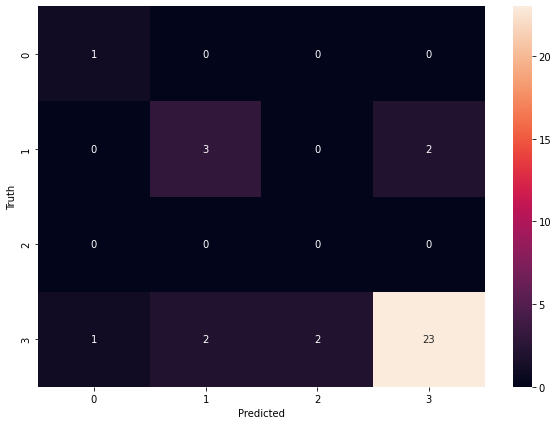

In [21]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=yp)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
##User Defined function to return the class of diabetes predicted by the model.
def prediction(X):
    y_p=model.predict(X)
    return class_labels[np.argmax(y_p)]

In [23]:
##TESTING
sample=X_test.iloc[:1,:]
print("Class Of Diabetes Detected: "+prediction(sample))

Class Of Diabetes Detected: Prediabetic


###  Saving the Model

In [26]:
model.save("model/diabetes.h5", overwrite=True, include_optimizer=False, save_format='tf')

In [25]:
# model.save('Model1.h5')